## Предобработка данных

Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Обработка датасета для задачи классификации

Исследуемый датасет: SMS Spam Collection Dataset <br>
Доступен по ссылке: https://www.kaggle.com/uciml/sms-spam-collection-dataset

Загрузка датасета:

In [2]:
spam_df = pd.read_csv('spam_data.csv', encoding='latin-1')

Датасет содержит множество сообщений со следующими данными:
- тип сообщения (v1) - ham (не спам) или 

Количество записей и столбцов в датасете:

In [3]:
spam_df.shape

(5572, 5)

Превью датасета:

In [4]:
spam_df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


Удаление NaN-колонок:

In [5]:
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
spam_df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Переименование столбцов:

In [6]:
spam_df = spam_df.rename({'v1':'target', 'v2':'text'}, axis=1)
spam_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Добавление длины (в символах) для каждого сообщения:

In [8]:
len_text = []
for i in spam_df['text']:
    len_text.append(len(i))

spam_df['text_length'] = len_text

spam_df.head()

,target,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Подсчет количества строк-дубликатов:

In [9]:
spam_df.duplicated().sum()

403

Удаление строк-дубликатов:

In [10]:
spam_df = spam_df[~spam_df.duplicated()==1]
spam_df.shape

(5169, 3)

Гистограмма количества символов для обычных и спам-сообщений:

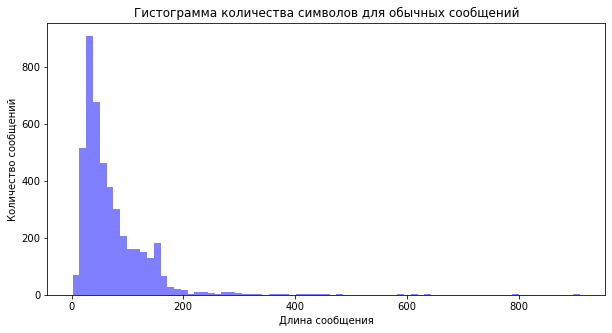

In [11]:
plt.figure(figsize=(10, 5))
spam_df[spam_df['target']=='ham']['text_length'].plot(bins=75, kind='hist', color='blue', alpha=0.5)
plt.title("Гистограмма количества символов для обычных сообщений")
plt.xlabel('Длина сообщения')
plt.ylabel('Количество сообщений')
plt.show()

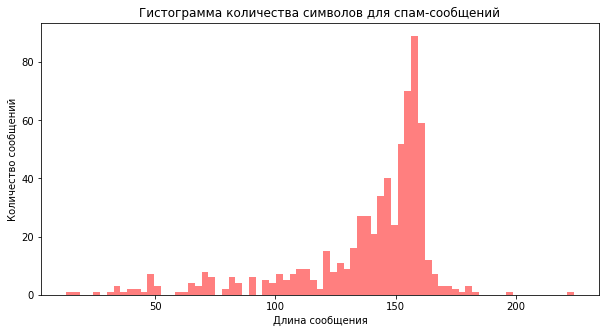

In [12]:
plt.figure(figsize=(10, 5))
spam_df[spam_df['target']=='spam']['text_length'].plot(bins=75, kind='hist', color='red', alpha=0.5)
plt.title("Гистограмма количества символов для спам-сообщений")
plt.xlabel('Длина сообщения')
plt.ylabel('Количество сообщений')
plt.show()

Исходя из данных гистограмм можно сделать вывод о том, что спам-сообщения, как правило, длиннее, чем обычные (основная масса спам-сообщений имеет длину в 130-170 символов против 0-150 символов для обычных сообщений).

Сохранение предобработанного датасета:

In [15]:
spam_df.to_csv('processed_spam_data.csv')

### Обработка датасета для задачи регрессии

Исследуемый датасет: Spotify Dataset 1921-2020 <br>
Доступен по ссылке: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Загрузка датасета:

In [16]:
spotify_df = pd.read_csv('spotify_data.csv')

Описание признаков, содержащихся в записях датасета Spotify:

- acousticness - мера достоверности того, записан ли трек с использованием реальных инструментов (от 0 до 1).

- danceability - мера "танцевальности" трека (от 0 до 1).

- duration_ms - длительность в миллисекундах.

- energy - энергетика трека (от 0 до 1).

- explicit - содержание нецензурной лексики (0 - нет, 1 - да).

- instrumentalness - мера общего количества вокальных партий (от 0 до 1).

- key - тоника трека (от 0 до 11). Если не определена, то -1.

- liveness - вероятность того, что трек был записан вживую (от 0 до 1).

- loudness - громкость трека (от -60 до 0 Децибел).

- mode - тональность трека (мажорная - 1, минорная - 0).

- popularity - мера популярности трека (от 0 до 100).

- speechiness - мера количества речи в треке (от 0 до 1).

- tempo - темп трека в BPM.

- valence - настроение трека (от 0 до 1, от депрессивного до позитивного).

Превью датасета (первые 5 записей):

In [17]:
spotify_df.sort_values(by="popularity", ascending=False).head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.212,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020


Удаление данных по нескольким колонкам:

In [18]:
spotify_df = spotify_df.drop(labels=['id'], axis=1)
spotify_df.shape

(174389, 18)

In [19]:
spotify_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


Подсчет количества дублированных записей:

In [20]:
spotify_df.duplicated().sum()

3163

Удаление дублированных записей:

In [21]:
spotify_df = spotify_df[~spotify_df.duplicated()==1]
spotify_df.shape

(171226, 18)

Подсчет количества NULL-значений:

In [22]:
spotify_df.isnull().sum().sum()

0

Выделение числовых и строковых признаков:

In [23]:
numeric_columns = spotify_df.columns[spotify_df.dtypes != 'object']
string_columns = spotify_df.columns[spotify_df.dtypes == 'object']
print("Количество числовых колонок: {0}\nКоличество числовых колонок: {1}".format(len(numeric_columns), len(string_columns)))

Количество числовых колонок: 15
Количество числовых колонок: 3


Исследование корреляции признаков для музыки 20-го века:

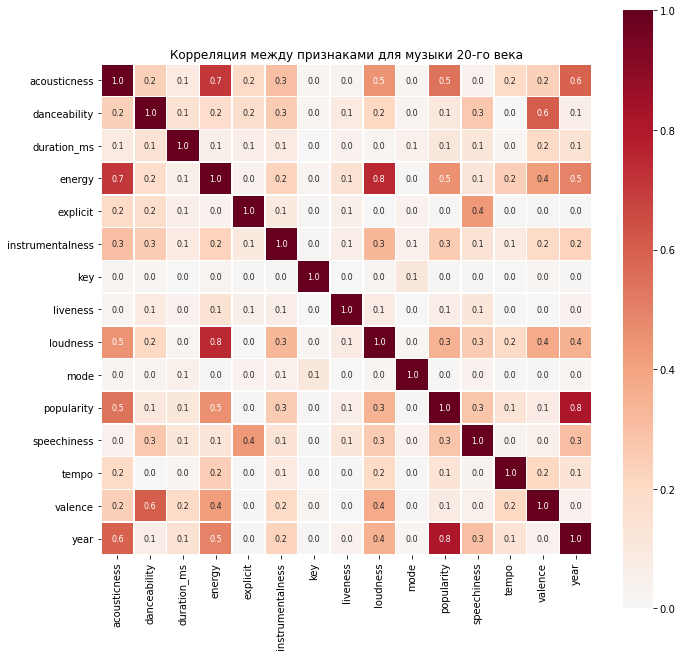

In [24]:
df_XX = spotify_df.loc[spotify_df['year'] < 2000]
numeric_df = pd.DataFrame(data = df_XX, columns = numeric_columns, index = spotify_df.index)
corr = abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, vmax=1, vmin=0, center=0,linewidth=.5, square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='RdBu_r')
plt.title('Корреляция между признаками для музыки 20-го века')
plt.show()

Исследование корреляции признаков для музыки 21-го века:

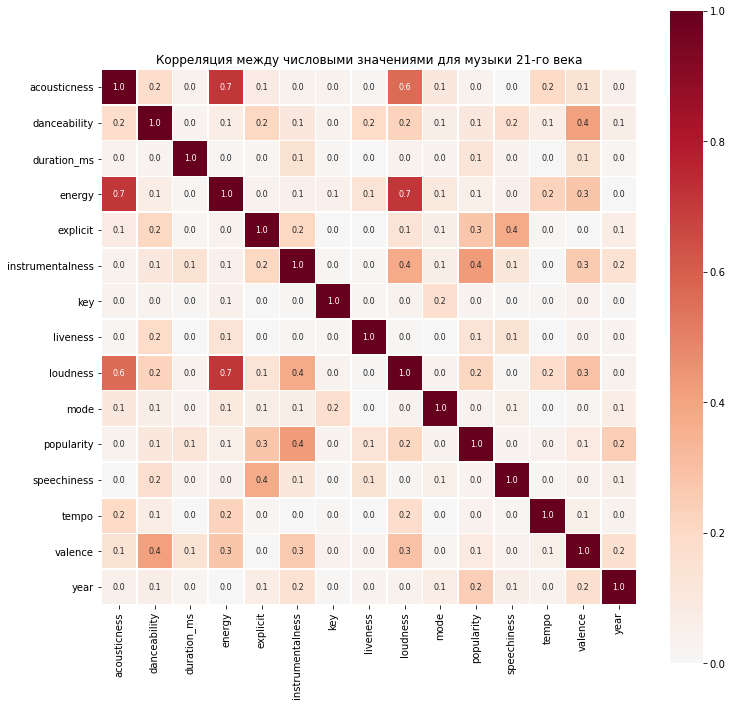

In [25]:
df_XXI = spotify_df.loc[spotify_df['year'] >= 2000]
numeric_df = pd.DataFrame(data = df_XXI, columns = numeric_columns, index = spotify_df.index)
corr = abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, vmax=1, vmin=0, center=0,linewidth=.5, square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='RdBu_r')
plt.title('Корреляция между числовыми значениями для музыки 21-го века')
plt.show()

Сохранение предобработанного датасета:

In [26]:
spotify_df.to_csv('processed_spotify_data.csv')